In [1]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('horse.csv')
print(data)

    surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        no  adult           530101         38.5   66.0              28.0   
1       yes  adult           534817         39.2   88.0              20.0   
2        no  adult           530334         38.3   40.0              24.0   
3       yes  young          5290409         39.1  164.0              84.0   
4        no  adult           530255         37.3  104.0              35.0   
..      ...    ...              ...          ...    ...               ...   
294     yes  adult           533886          NaN  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0              24.0   
298     yes  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0              

In [3]:
data.describe().T

count          mean           std       min       25%  \
hospital_number        299.0  1.087733e+06  1.532032e+06  518476.0  528904.0   
rectal_temp            239.0  3.816862e+01  7.337444e-01      35.4      37.8   
pulse                  275.0  7.200000e+01  2.864622e+01      30.0      48.0   
respiratory_rate       241.0  3.046058e+01  1.766610e+01       8.0      18.0   
nasogastric_reflux_ph   53.0  4.707547e+00  1.982311e+00       1.0       3.0   
packed_cell_volume     270.0  4.630741e+01  1.043674e+01      23.0      38.0   
total_protein          266.0  2.427444e+01  2.736419e+01       3.3       6.5   
abdomo_protein         101.0  3.039604e+00  1.967947e+00       0.1       2.0   
lesion_1               299.0  3.659709e+03  5.408472e+03       0.0    2111.5   
lesion_2               299.0  9.052843e+01  6.506371e+02       0.0       0.0   
lesion_3               299.0  7.387960e+00  1.277498e+02       0.0       0.0   

                            50%        75%        max  
hospital_number        530301.0  534736.00  5305629.0  
rectal_temp                38.2      38.50       40.8  
pulse                      64.0      88.00      184.0  
respiratory_rate           25.0      36.00       96.0  
nasogastric_reflux_ph       5.0       6.50        7.5  
packed_cell_volume         45.0      52.00       75.0  
total_protein               7.5      56.75       89.0  
abdomo_protein              2.3       3.90       10.1  
lesion_1                 2322.0    3209.00    41110.0  
lesion_2                    0.0       0.00     7111.0  
lesion_3                    0.0       0.00     2209.0

In [4]:
data.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [5]:
data = data.fillna(0)
print(data)

    surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        no  adult           530101         38.5   66.0              28.0   
1       yes  adult           534817         39.2   88.0              20.0   
2        no  adult           530334         38.3   40.0              24.0   
3       yes  young          5290409         39.1  164.0              84.0   
4        no  adult           530255         37.3  104.0              35.0   
..      ...    ...              ...          ...    ...               ...   
294     yes  adult           533886          0.0  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0              24.0   
298     yes  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0              

In [6]:
import pandas_profiling as pp

In [7]:
pp.ProfileReport(data)

In [8]:
data.columns.values

array(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1',
       'lesion_2', 'lesion_3', 'cp_data'], dtype=object)

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [10]:
X = data.drop('surgery', axis=1)
Y = data.surgery
X = sm.add_constant(X)

In [16]:
X

const    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      1.0  adult           530101         38.5   66.0              28.0   
1      1.0  adult           534817         39.2   88.0              20.0   
2      1.0  adult           530334         38.3   40.0              24.0   
3      1.0  young          5290409         39.1  164.0              84.0   
4      1.0  adult           530255         37.3  104.0              35.0   
..     ...    ...              ...          ...    ...               ...   
294    1.0  adult           533886          0.0  120.0              70.0   
295    1.0  adult           527702         37.2   72.0              24.0   
296    1.0  adult           529386         37.5   72.0              30.0   
297    1.0  adult           530612         36.5  100.0              24.0   
298    1.0  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0                  cool          reduced               0   
1                     0                0   pale_cyanotic   
2                normal           normal       pale_pink   
3                  cold           normal   dark_cyanotic   
4                     0                0   dark_cyanotic   
..                  ...              ...             ...   
294                cold                0   pale_cyanotic   
295                cool        increased   pale_cyanotic   
296                cold          reduced   pale_cyanotic   
297                cool          reduced       pale_pink   
298                   0                0               0   

    capillary_refill_time  ... packed_cell_volume total_protein  \
0              more_3_sec  ...               45.0           8.4   
1              less_3_sec  ...               50.0          85.0   
2              less_3_sec  ...               33.0           6.7   
3              more_3_sec  ...               48.0           7.2   
4              more_3_sec  ...               74.0           7.4   
..                    ...  ...                ...           ...   
294            more_3_sec  ...               55.0          65.0   
295            more_3_sec  ...               44.0           0.0   
296            less_3_sec  ...               60.0           6.8   
297            less_3_sec  ...               50.0           6.0   
298                     0  ...               36.0          62.0   

    abdomo_appearance abdomo_protein     outcome  surgical_lesion lesion_1  \
0                   0            0.0        died               no    11300   
1              cloudy            2.0  euthanized               no     2208   
2                   0            0.0       lived               no        0   
3       serosanguious            5.3        died              yes     2208   
4                   0            0.0        died               no     4300   
..                ...            ...         ...              ...      ...   
294                 0            0.0  euthanized               no     3205   
295     serosanguious            3.3  euthanized              yes     2208   
296                 0            0.0        died              yes     3205   
297     serosanguious            3.4       lived              yes     2208   
298             clear            1.0  euthanized               no     6112   

    lesion_2  lesion_3  cp_data  
0          0         0       no  
1          0         0       no  
2          0         0      yes  
3          0         0      yes  
4          0         0       no  
..       ...       ...      ...  
294        0         0       no  
295        0         0      yes  
296        0         0       no  
297        0         0      yes  
298        0         0       no  

[299 rows x 28 columns]

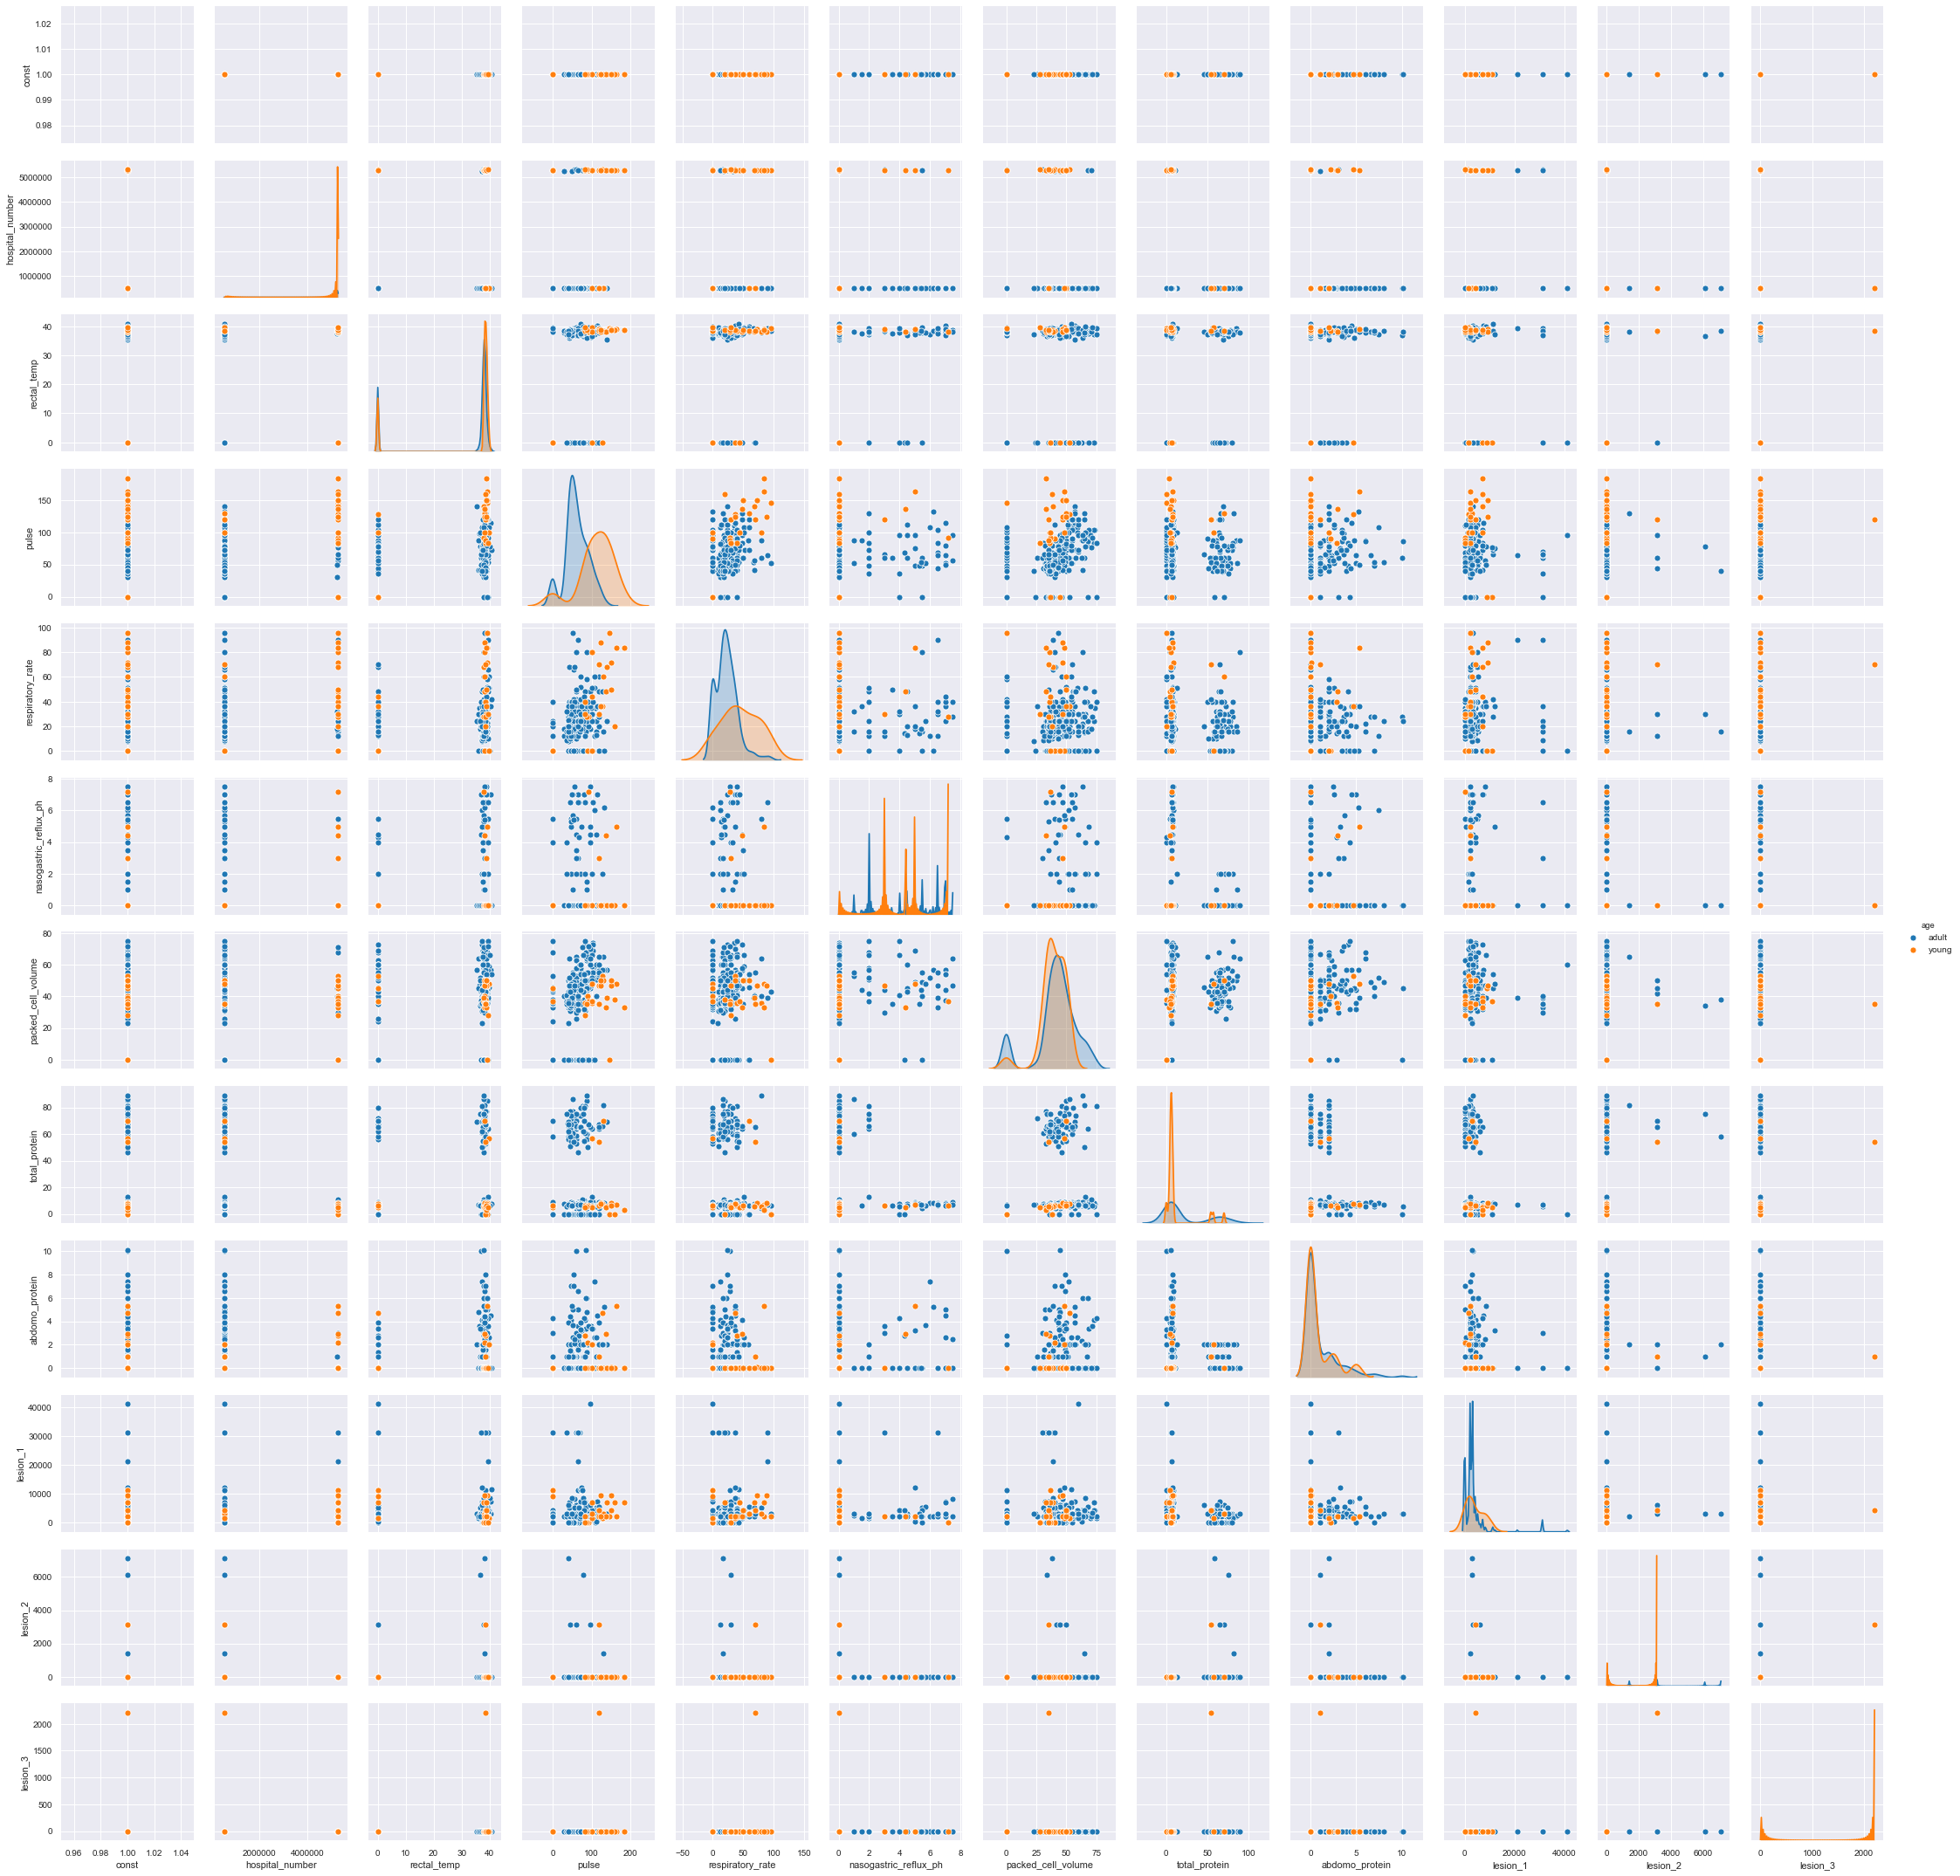

In [17]:
sns.pairplot(X, hue='age')

In [18]:
LabelEncoding, OneHotEncoding


NameError: name 'LabelEncoding' is not defined

In [ ]:
#linear regression
import statsmodels.api as sm
